This dataset is from the paper:  Early prediction of student's performance in higher education: a case study
By Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho. 2021
Published in Trends and Applications in Information Systems and Technologies

The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place.

I built machine learning models to predict if the students will graduate or dropout both at the beginning of the study and after 1 year of the study. Obviously it is much more accurate to predict the student's academic success after 1 year of study than at the starting. Predictions at the beginning is still valuable due to the early discovery. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('data/data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
# THere is no missing values for every column, but it does not mean the dataset is clean and can be used directly. 
# Still there is a a lot of data preparation work to do.
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [4]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

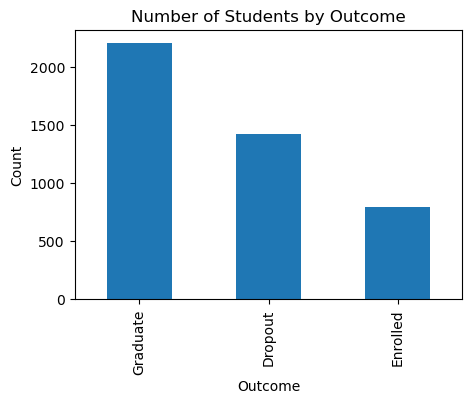

In [5]:
plt.figure(figsize=(5,3.5))
df['Target'].value_counts().plot(kind='bar')
plt.title("Number of Students by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [6]:
print(df.Target.value_counts())
data = df[df.Target!='Enrolled'].copy()
print(df.shape)
print(data.shape) # Confirm the "Enrolled" rows are deleted

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
(4424, 37)
(3630, 37)


In [7]:
print(data[data['Marital status']==1].Target.value_counts())
print(data[data['Marital status']==2].Target.value_counts())
print(data[data['Marital status']>2].Target.value_counts()) # All the status other than single or married

# The Marital status does have some effects on graduation rate (may be age related). 
# The married or other status 

Target
Graduate    2015
Dropout     1184
Name: count, dtype: int64
Target
Dropout     179
Graduate    148
Name: count, dtype: int64
Target
Dropout     58
Graduate    46
Name: count, dtype: int64


In [8]:
# Convert Marital status =1 (single) to 0, Marital status >1 to 1 (married and others) 
data["Marital status"] = data["Marital status"].apply(lambda x: 0 if x == 1 else 1)
data['Marital status'].value_counts()

Marital status
0    3199
1     431
Name: count, dtype: int64

In [9]:
def check_feature(n):
    # Count of each value
    counts = data[n].value_counts()
    
    grad_rate = data.groupby(n)["Target"].apply(lambda x: (x == "Graduate").mean())
    
    # Combine into a single DataFrame
    summary = pd.DataFrame({
        "Count": counts,
        "Graduate Rate": grad_rate
    })
    
    summary = summary.sort_values(by='Graduate Rate', ascending=False)
    
    print(summary)

In [16]:
check_feature("Mother's qualification")

                        Count  Graduate Rate
Mother's qualification                      
26                          1       1.000000
22                          1       1.000000
4                          34       0.764706
38                        471       0.702760
43                          3       0.666667
41                          6       0.666667
30                          3       0.666667
29                          3       0.666667
2                          60       0.666667
1                         865       0.653179
19                        777       0.651223
40                          8       0.625000
3                         337       0.587537
37                        840       0.544048
14                          2       0.500000
42                          4       0.500000
5                          16       0.500000
12                         39       0.435897
9                           8       0.375000
39                          6       0.333333
35        

In [10]:
check_feature('Application order')

                   Count  Graduate Rate
Application order                      
0                      1       1.000000
6                    121       0.743802
4                    218       0.733945
3                    249       0.694779
2                    451       0.667406
5                    129       0.589147
1                   2461       0.572125


In [17]:
# Assign application orders to different groups, graduation rate>0.6 and <0.6 are different groups

ord_grad_rate = data.groupby('Application order')["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_ord_group(rate):
    if rate < 0.6:
        return 0
    else:
        return 1

# Assign groups
bins_manual = ord_grad_rate.apply(manual_ord_group)

data["ord_group"] = data['Previous qualification'].map(bins_manual)

In [15]:
# Special needs do not have much effect on the graduation rate, this feature will not be selected.

check_feature('Educational special needs')

                           Count  Graduate Rate
Educational special needs                      
0                           3590       0.608914
1                             40       0.575000


In [11]:
# There is a slight difference between daytime and evening session

check_feature('Daytime/evening attendance\t')

                              Count  Graduate Rate
Daytime/evening attendance\t                      
1                              3222       0.623215
0                               408       0.492647


In [18]:
# Applicatin mode matters, but there are too many categorical values

check_feature('Application mode')

                  Count  Graduate Rate
Application mode                      
57                    1       1.000000
53                   25       0.840000
16                   30       0.833333
1                  1408       0.754972
15                   20       0.750000
5                     8       0.750000
10                   10       0.700000
17                  713       0.640954
44                  157       0.598726
18                  108       0.583333
51                   46       0.565217
43                  237       0.514768
42                   66       0.484848
7                   132       0.356061
39                  664       0.344880
2                     3       0.333333
27                    1       0.000000
26                    1       0.000000


In [43]:
# Reduce the Application mode to 3 groups according to the graduation rate.

mode_grad_rate = data.groupby("Application mode")["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_course_group(rate):
    if rate < 0.36:
        return 'Low'
    elif rate < 0.74:
        return 'Mid'
    else:
        return "High"

bins_manual = mode_grad_rate.apply(manual_course_group)

data["Mode_Group"] = data["Application mode"].map(bins_manual)

In [82]:
check_feature('Nacionality')
data[data.Nacionality>1].Target.value_counts()
# Most of the student are 1, there is no significant difference between 1 and other. This feature will not be used. 

             Count  Graduate Rate
Nacionality                      
25               1       1.000000
11               3       1.000000
13               1       1.000000
14               1       1.000000
62               1       1.000000
2                2       1.000000
26               9       0.888889
24               5       0.800000
103              3       0.666667
22              12       0.666667
1             3544       0.608070
41              32       0.562500
101              2       0.500000
6                8       0.500000
21               1       0.000000
17               1       0.000000
100              2       0.000000
105              1       0.000000
109              1       0.000000


Target
Graduate    54
Dropout     32
Name: count, dtype: int64

In [19]:
# Each course has very different grdauation rate
check_feature('Course')

        Count  Graduate Rate
Course                      
9500      666       0.822823
9238      313       0.792332
9070      184       0.722826
9773      297       0.659933
9085      262       0.656489
8014      194       0.634021
9670      220       0.568182
9254      211       0.545024
171       178       0.539326
9556       69       0.521739
9147      272       0.507353
9003      173       0.502890
9853      142       0.401408
9991      214       0.364486
9130      120       0.350000
9119      106       0.132075
33          9       0.111111


In [29]:
# Separate the course into 4 different groups to reduce the dimension

course_grad_rate = data.groupby("Course")["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_course_group(rate):
    if rate < 0.41:
        return 'Low'
    elif rate < 0.57:
        return 'Mid1'
    elif rate < 0.73:
        return 'Mid2'
    else:
        return "High"

bins_manual = course_grad_rate.apply(manual_course_group)

data["Course_Group"] = data["Course"].map(bins_manual)

In [20]:
check_feature('Previous qualification')

                        Count  Graduate Rate
Previous qualification                      
42                         28       0.785714
43                          6       0.666667
1                        3019       0.642928
40                         34       0.588235
39                        164       0.579268
6                          15       0.533333
15                          2       0.500000
38                          6       0.500000
4                           7       0.428571
3                         122       0.385246
12                         39       0.333333
19                        149       0.302013
2                          22       0.272727
10                          4       0.250000
5                           1       0.000000
9                          11       0.000000
14                          1       0.000000


In [30]:
# Assign groups to Previous qualification

pre_grad_rate = data.groupby('Previous qualification')["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_course_group(rate):
    if rate < 0.51:
        return 0
    else:
        return 1

bins_manual = pre_grad_rate.apply(manual_course_group)

data["pre_q_group"] = data['Previous qualification'].map(bins_manual)

In [58]:
data[data["Previous qualification (grade)"]>180].Target.value_counts()

Target
Dropout     2
Graduate    2
Name: count, dtype: int64

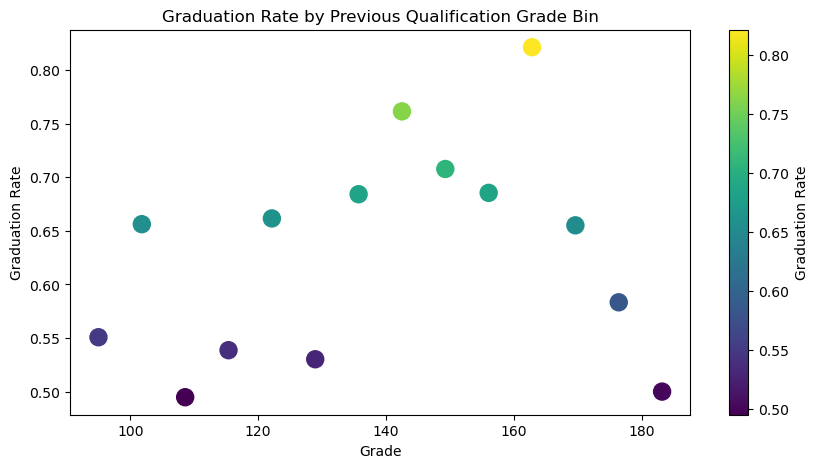

In [31]:
# Check the graduation rate vs. Previous qualification grade


# Bin edges
bins = np.linspace(data["Previous qualification (grade)"].min(),
                   data["Previous qualification (grade)"].max(),
                   15)

# Compute per-bin graduation rate
bin_idx = np.digitize(data["Previous qualification (grade)"], bins)

graduation_rate = []
for i in range(1, len(bins)):
    bin_data = data[bin_idx == i]
    if len(bin_data) > 0:
        rate = (bin_data["Target"]=="Graduate").mean()
    else:
        rate = np.nan
    graduation_rate.append(rate)

plt.figure(figsize=(10,5))
plt.scatter(bins[:-1], graduation_rate, c=graduation_rate, cmap="viridis", s=150)
plt.colorbar(label="Graduation Rate")
plt.title("Graduation Rate by Previous Qualification Grade Bin")
plt.xlabel("Grade")
plt.ylabel("Graduation Rate")
plt.show()

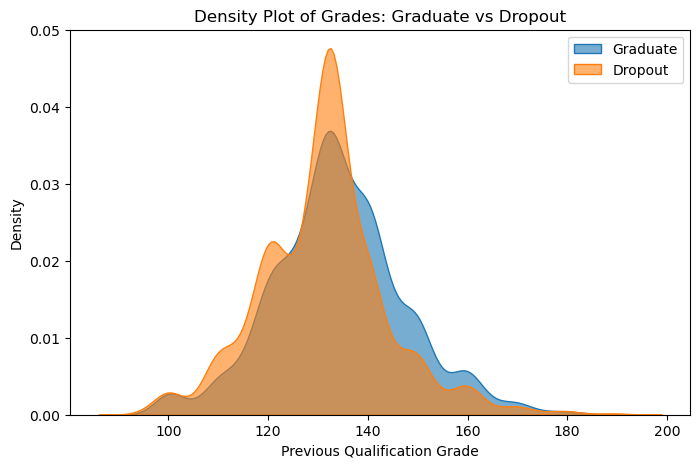

In [76]:
# Check the distribution density of graduation/dropout vs. Previous qualification grade

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=data[data["Target"]=="Graduate"],
    x="Previous qualification (grade)",
    fill=True,
    alpha=0.6,
    label="Graduate"
)

sns.kdeplot(
    data=data[data["Target"]=="Dropout"],
    x="Previous qualification (grade)",
    fill=True,
    alpha=0.6,
    label="Dropout"
)

plt.legend()
plt.title("Density Plot of Grades: Graduate vs Dropout")
plt.xlabel("Previous Qualification Grade")
plt.show()

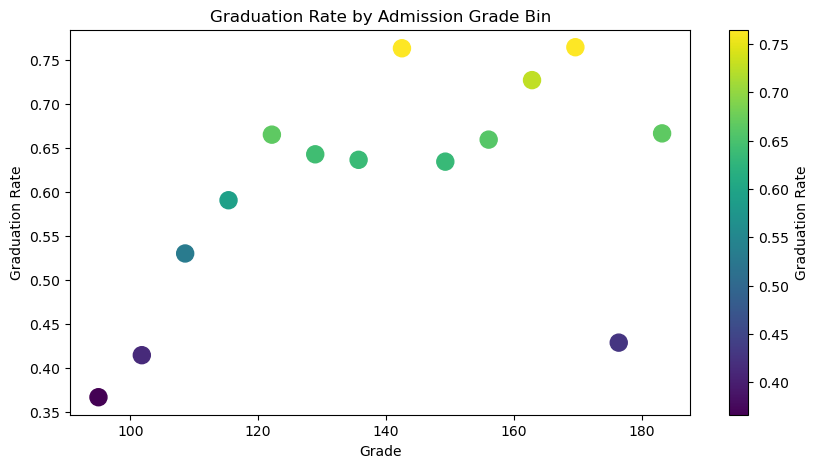

In [62]:
# Check the graduation rate vs. Admission grade

bins = np.linspace(data["Admission grade"].min(),
                   data["Admission grade"].max(),
                   15)


bin_idx = np.digitize(data["Admission grade"], bins)

graduation_rate = []
for i in range(1, len(bins)):
    bin_data = data[bin_idx == i]
    if len(bin_data) > 0:
        rate = (bin_data["Target"]=="Graduate").mean()
    else:
        rate = np.nan
    graduation_rate.append(rate)

plt.figure(figsize=(10,5))
plt.scatter(bins[:-1], graduation_rate, c=graduation_rate, cmap="viridis", s=150)
plt.colorbar(label="Graduation Rate")
plt.title("Graduation Rate by Admission Grade Bin")
plt.xlabel("Grade")
plt.ylabel("Graduation Rate")
plt.show()

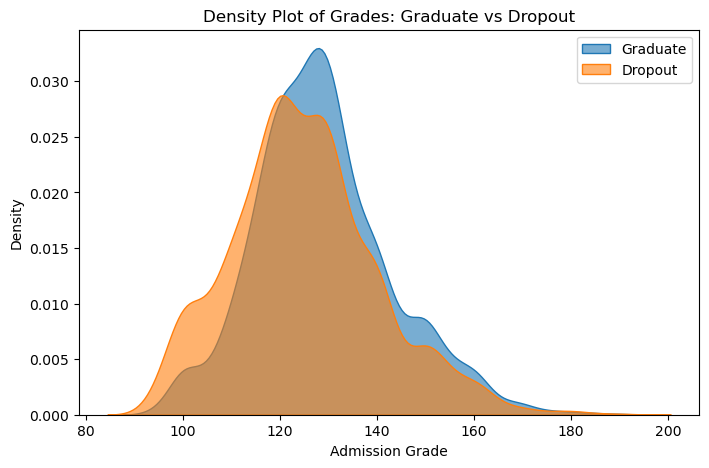

In [77]:
# Check the graduation rate vs. Admission grade


plt.figure(figsize=(8,5))
sns.kdeplot(
    data=data[data["Target"]=="Graduate"],
    x="Admission grade",
    fill=True,
    alpha=0.6,
    label="Graduate"
)

sns.kdeplot(
    data=data[data["Target"]=="Dropout"],
    x="Admission grade",
    fill=True,
    alpha=0.6,
    label="Dropout"
)

plt.legend()
plt.title("Density Plot of Grades: Graduate vs Dropout")
plt.xlabel("Admission Grade")
plt.show()

In [34]:
check_feature("Mother's qualification")

                        Count  Graduate Rate
Mother's qualification                      
26                          1       1.000000
22                          1       1.000000
4                          34       0.764706
38                        471       0.702760
43                          3       0.666667
41                          6       0.666667
30                          3       0.666667
29                          3       0.666667
2                          60       0.666667
1                         865       0.653179
19                        777       0.651223
40                          8       0.625000
3                         337       0.587537
37                        840       0.544048
14                          2       0.500000
42                          4       0.500000
5                          16       0.500000
12                         39       0.435897
9                           8       0.375000
39                          6       0.333333
35        

In [36]:
# Assign groups to mother's qualification

mq_grad_rate = data.groupby("Mother's qualification")["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_mq_group(rate):
    if rate < 0.45:
        return 'Low'
    elif rate < 0.67:
        return 'Mid'
    else:
        return "High"

bins_manual = mq_grad_rate.apply(manual_mq_group)

data["Mq_Group"] = data["Mother's qualification"].map(bins_manual)

In [99]:
check_feature("Father's qualification")

                        Count  Graduate Rate
Father's qualification                      
43                          2       1.000000
42                          1       1.000000
9                           5       0.800000
14                          4       0.750000
38                        575       0.709565
30                          3       0.666667
19                        785       0.663694
1                         732       0.616120
11                         10       0.600000
3                         220       0.590909
12                         34       0.588235
37                       1010       0.572277
4                          32       0.562500
26                          2       0.500000
2                          43       0.488372
40                          5       0.400000
39                         13       0.384615
36                          8       0.375000
5                          15       0.333333
34                        109       0.256881
20        

In [38]:
# Assign groups to father's qualification

fq_grad_rate = data.groupby("Father's qualification")["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_fq_group(rate):
    if rate < 0.45:
        return 'Low'
    elif rate < 0.67:
        return 'Mid'
    else:
        return "High"

bins_manual = fq_grad_rate.apply(manual_fq_group)

data["Fq_Group"] = data["Father's qualification"].map(bins_manual)

In [101]:
check_feature("Mother's occupation")

                     Count  Graduate Rate
Mother's occupation                      
125                      1       1.000000
132                      1       1.000000
192                      2       1.000000
191                     15       1.000000
171                      1       1.000000
153                      2       1.000000
152                      1       1.000000
151                      2       1.000000
144                      4       1.000000
143                      1       1.000000
141                      4       1.000000
193                      4       0.750000
194                      4       0.750000
175                      3       0.666667
6                       77       0.662338
3                      272       0.650735
7                      224       0.642857
5                      436       0.642202
4                      670       0.629851
9                     1313       0.626809
123                      5       0.600000
2                      240       0

In [39]:
# Assign groups to mother's occupation

mo_grad_rate = data.groupby("Mother's occupation")["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_mo_group(rate):
    if rate < 0.35:
        return 'Low'
    elif rate < 0.58:
        return 'Mid1'
    elif rate < 0.67:
        return 'Mid2'
    else:
        return "High"

bins_manual = mo_grad_rate.apply(manual_mo_group)

data["Mo_Group"] = data["Mother's occupation"].map(bins_manual)

In [103]:
check_feature("Father's occupation")

                     Count  Graduate Rate
Father's occupation                      
131                      1       1.000000
163                      2       1.000000
135                      2       1.000000
141                      1       1.000000
143                      1       1.000000
144                      5       1.000000
151                      2       1.000000
153                      1       1.000000
154                      1       1.000000
171                      3       1.000000
123                      1       1.000000
172                      1       1.000000
174                      1       1.000000
175                      2       1.000000
181                      2       1.000000
182                      1       1.000000
183                      1       1.000000
192                      4       1.000000
124                      1       1.000000
195                      1       1.000000
122                      1       1.000000
114                      1       1

In [40]:
# # Assign groups to father's qualification

fo_grad_rate = data.groupby("Father's occupation")["Target"].apply(lambda x: (x=="Graduate").mean())

def manual_fo_group(rate):
    if rate < 0.35:
        return 'Low'
    elif rate < 0.58:
        return 'Mid1'
    elif rate < 0.67:
        return 'Mid2'
    else:
        return "High"

bins_manual = fo_grad_rate.apply(manual_fo_group)

data["Fo_Group"] = data["Father's occupation"].map(bins_manual)

In [97]:
check_feature('Debtor')

        Count  Graduate Rate
Debtor                      
0        3217       0.655269
1         413       0.244552


In [98]:
check_feature('Scholarship holder')

                    Count  Graduate Rate
Scholarship holder                      
1                     969       0.861713
0                    2661       0.516347


In [105]:
check_feature('Displaced')

           Count  Graduate Rate
Displaced                      
1           1993       0.664325
0           1637       0.540623


In [106]:
check_feature('Gender')

        Count  Graduate Rate
Gender                      
0        2381       0.697606
1        1249       0.438751


In [107]:
check_feature('Educational special needs')

                           Count  Graduate Rate
Educational special needs                      
0                           3590       0.608914
1                             40       0.575000


In [109]:
check_feature("Tuition fees up to date")

                         Count  Graduate Rate
Tuition fees up to date                      
1                         3144       0.693384
0                          486       0.059671


In [114]:
check_feature('International')

               Count  Graduate Rate
International                      
1                 86       0.627907
0               3544       0.608070


In [115]:
check_feature('Curricular units 1st sem (approved)')

                                     Count  Graduate Rate
Curricular units 1st sem (approved)                      
26                                       1       1.000000
20                                       3       1.000000
19                                       2       1.000000
18                                      15       1.000000
16                                       5       1.000000
15                                       6       1.000000
7                                      429       0.923077
17                                      10       0.900000
8                                       94       0.893617
6                                     1033       0.886738
12                                      40       0.850000
11                                      42       0.809524
9                                       35       0.771429
10                                      21       0.761905
21                                       4       0.750000
5             

In [116]:
check_feature('Curricular units 2nd sem (approved)')

                                     Count  Graduate Rate
Curricular units 2nd sem (approved)                      
20                                       2       1.000000
19                                       3       1.000000
18                                       2       1.000000
17                                       8       1.000000
14                                       6       1.000000
13                                      21       0.952381
8                                      306       0.934641
7                                      287       0.933798
6                                      867       0.926182
11                                      44       0.886364
5                                      569       0.790861
12                                      32       0.781250
9                                       25       0.760000
10                                      32       0.687500
4                                      254       0.559055
3             

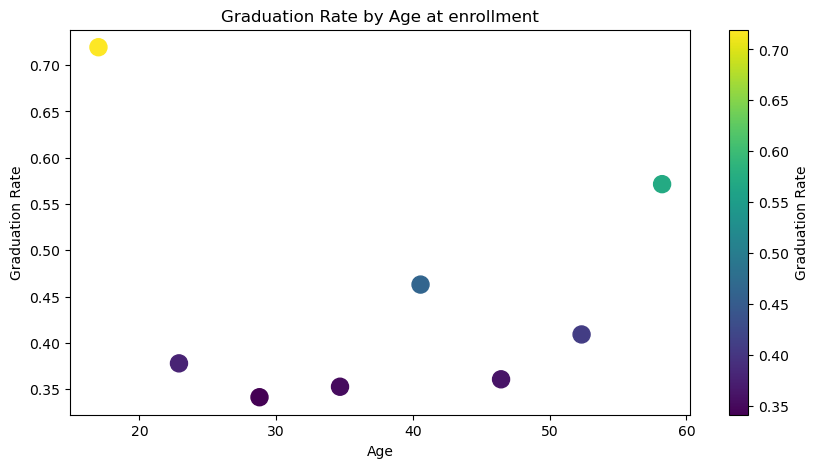

In [21]:
# Check the age at enrollment vs. graduation rate

# Bin edges
bins = np.linspace(data["Age at enrollment"].min(),
                   data["Age at enrollment"].max(),
                   10)

# Compute per-bin graduation rate
bin_idx = np.digitize(data["Age at enrollment"], bins)

graduation_rate = []
for i in range(1, len(bins)):
    bin_data = data[bin_idx == i]
    if len(bin_data) > 0:
        rate = (bin_data["Target"]=="Graduate").mean()
    else:
        rate = np.nan
    graduation_rate.append(rate)

plt.figure(figsize=(10,5))
plt.scatter(bins[:-1], graduation_rate, c=graduation_rate, cmap="viridis", s=150)
plt.colorbar(label="Graduation Rate")
plt.title("Graduation Rate by Age at enrollment")
plt.xlabel("Age")
plt.ylabel("Graduation Rate")
plt.show()

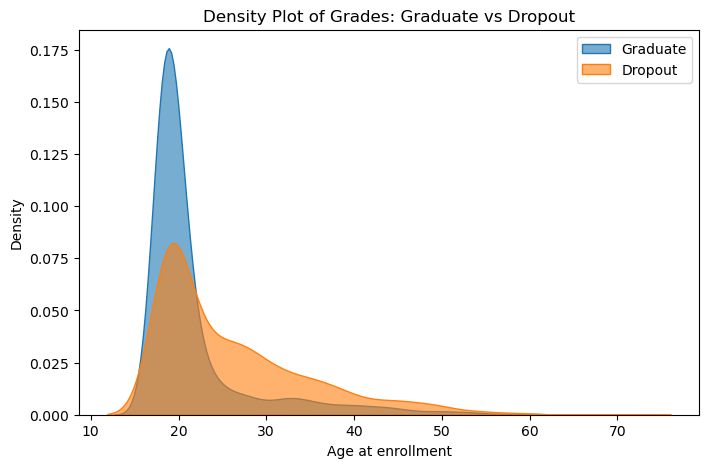

In [112]:
# Check the grduate/dropout density vs. age at enrollment

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=data[data["Target"]=="Graduate"],
    x="Age at enrollment",
    fill=True,
    alpha=0.6,
    label="Graduate"
)

sns.kdeplot(
    data=data[data["Target"]=="Dropout"],
    x="Age at enrollment",
    fill=True,
    alpha=0.6,
    label="Dropout"
)

plt.legend()
plt.title("Density Plot of Grades: Graduate vs Dropout")
plt.xlabel("Age at enrollment")
plt.show()

In [118]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [50]:
# Will work on 2 datasets. !st data is only used for predicting the studnet grduate/dropout before the college study starting. So ist and 2nd semester 
# course grade and pass rate will not be selected.

data_choose = data[['Course_Group','Mode_Group', 'pre_q_group', 'ord_group', 'Mq_Group', 'Fq_Group',
       'Mo_Group', 'Fo_Group', 'Previous qualification (grade)', 'Admission grade', 'Displaced',
        'Debtor', 'Gender', 'Scholarship holder','Age at enrollment', 'Marital status', 'Daytime/evening attendance\t', 'Target']].copy()

In [51]:
data_choose.shape

(3630, 18)

In [52]:
data_choose.to_csv('data/data1.csv')

In [14]:
check_feature('Curricular units 1st sem (credited)')

                                     Count  Graduate Rate
Curricular units 1st sem (credited)                      
20                                       2       1.000000
19                                       2       1.000000
17                                       3       1.000000
16                                       3       1.000000
12                                      11       0.818182
8                                       27       0.814815
5                                       31       0.806452
15                                       5       0.800000
18                                       4       0.750000
9                                       24       0.750000
7                                       31       0.709677
11                                      16       0.687500
6                                       43       0.674419
3                                       57       0.631579
0                                     3150       0.605714
13            

In [15]:
check_feature('Curricular units 1st sem (enrolled)')

                                     Count  Graduate Rate
Curricular units 1st sem (enrolled)                      
26                                       1       1.000000
23                                       2       1.000000
19                                       2       1.000000
16                                      12       0.916667
8                                      264       0.901515
18                                      19       0.894737
11                                      37       0.864865
14                                      22       0.863636
21                                       6       0.833333
12                                      54       0.722222
7                                      546       0.699634
17                                      13       0.692308
13                                      16       0.625000
6                                     1594       0.620452
9                                       31       0.612903
0             

In [16]:
check_feature('Curricular units 1st sem (evaluations)')

                                        Count  Graduate Rate
Curricular units 1st sem (evaluations)                      
45                                          2       1.000000
36                                          1       1.000000
33                                          1       1.000000
32                                          1       1.000000
29                                          2       1.000000
28                                          1       1.000000
27                                          2       1.000000
22                                         10       0.800000
7                                         621       0.782609
23                                          9       0.777778
8                                         674       0.777448
26                                          4       0.750000
6                                         530       0.741509
21                                         15       0.733333
19                      

In [17]:
check_feature('Curricular units 1st sem (approved)')

                                     Count  Graduate Rate
Curricular units 1st sem (approved)                      
26                                       1       1.000000
20                                       3       1.000000
19                                       2       1.000000
18                                      15       1.000000
16                                       5       1.000000
15                                       6       1.000000
7                                      429       0.923077
17                                      10       0.900000
8                                       94       0.893617
6                                     1033       0.886738
12                                      40       0.850000
11                                      42       0.809524
9                                       35       0.771429
10                                      21       0.761905
21                                       4       0.750000
5             

In [18]:
check_feature('Curricular units 2nd sem (approved)')

                                     Count  Graduate Rate
Curricular units 2nd sem (approved)                      
20                                       2       1.000000
19                                       3       1.000000
18                                       2       1.000000
17                                       8       1.000000
14                                       6       1.000000
13                                      21       0.952381
8                                      306       0.934641
7                                      287       0.933798
6                                      867       0.926182
11                                      44       0.886364
5                                      569       0.790861
12                                      32       0.781250
9                                       25       0.760000
10                                      32       0.687500
4                                      254       0.559055
3             

In [19]:
# How many coursed did the student not pass in the first semester, it is an important feature

data['notpass_1']= data['Curricular units 1st sem (enrolled)']-data['Curricular units 1st sem (approved)']
check_feature('notpass_1')

           Count  Graduate Rate
notpass_1                      
0           1698       0.865724
1            742       0.785714
9              2       0.500000
2            317       0.375394
3            180       0.127778
5            245       0.024490
4            148       0.020270
7             65       0.015385
6            229       0.013100
8              4       0.000000


In [20]:
# How many coursed did the student not pass in the second semester

data['notpass_2']= data['Curricular units 2nd sem (enrolled)']-data['Curricular units 2nd sem (approved)']
check_feature('notpass_2')

           Count  Graduate Rate
notpass_2                      
0           1617       0.894249
1            713       0.838710
2            268       0.447761
3            174       0.178161
4            137       0.065693
7             41       0.024390
6            309       0.009709
5            325       0.003077
8             45       0.000000
9              1       0.000000


In [21]:
# This is also an important feature after the college study

check_feature('Tuition fees up to date')

                         Count  Graduate Rate
Tuition fees up to date                      
1                         3144       0.693384
0                          486       0.059671


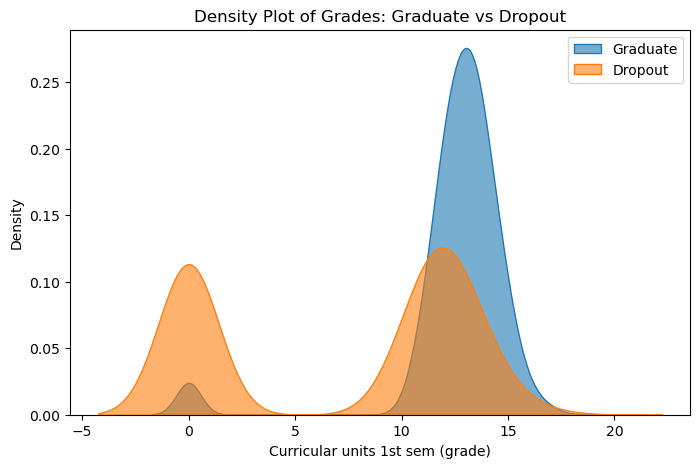

In [24]:
# First semester grade vs. grdudate/dropout rate

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=data[data["Target"]=="Graduate"],
    x="Curricular units 1st sem (grade)",
    fill=True,
    alpha=0.6,
    label="Graduate"
)

sns.kdeplot(
    data=data[data["Target"]=="Dropout"],
    x="Curricular units 1st sem (grade)",
    fill=True,
    alpha=0.6,
    label="Dropout"
)

plt.legend()
plt.title("Density Plot of Grades: Graduate vs Dropout")
plt.xlabel("Curricular units 1st sem (grade)")
plt.show()

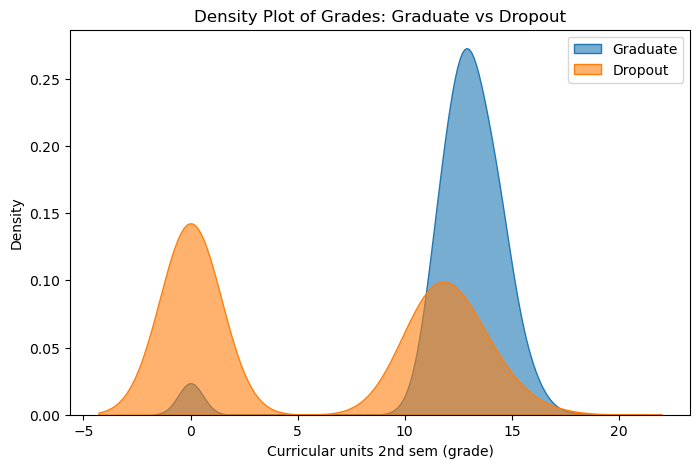

In [25]:
# Second semester grade vs. grdudate/dropout rate

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=data[data["Target"]=="Graduate"],
    x="Curricular units 2nd sem (grade)",
    fill=True,
    alpha=0.6,
    label="Graduate"
)

sns.kdeplot(
    data=data[data["Target"]=="Dropout"],
    x="Curricular units 2nd sem (grade)",
    fill=True,
    alpha=0.6,
    label="Dropout"
)

plt.legend()
plt.title("Density Plot of Grades: Graduate vs Dropout")
plt.xlabel("Curricular units 2nd sem (grade)")
plt.show()

In [26]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [54]:
# Second dataset will include the first and second course work performance

data_choose_2 = data[['Course_Group','Mode_Group', 'pre_q_group', 'ord_group', 'Mq_Group', 'Fq_Group',
       'Mo_Group', 'Fo_Group', 'Previous qualification (grade)', 'Admission grade', 'Displaced',
        'Debtor', 'Gender', 'Scholarship holder','Age at enrollment', 'Marital status', 'Daytime/evening attendance\t',
        'Tuition fees up to date', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
        'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'notpass_1', 'notpass_2', 'Target']].copy()

In [55]:
data_choose_2.to_csv('data/data2.csv')